In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
os.getcwd()
from json import load

# MirrorRL

In [6]:
def plot(path, limsup = None):
    all_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    for f in all_folders:
        data = pd.read_csv(path+f+"/progress.csv")
        fig = plt.figure(0)
        if limsup != None:
            data = data[data["time_total_s"]<limsup]
        labels = f.split(",")
        eta = labels[1][4:]
        # "time_total_s" "average_reward" "q_error_train" "kl" "entropy"
        plt.plot(data["time_total_s"], data["average_reward"], label=eta)
    plt.legend()
    plt.show()

def plot_all(path, limsup = None, figsize=(10,8), single_pmts = False, time = False):

    all_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    fig, axs = plt.subplots(2, 2, figsize=figsize)
    for f in all_folders:
        df = pd.read_csv(path+f+"/progress.csv")
        with open(path+f+"/params.json") as fpms:
            pms = load(fpms)
            lab = "eta = " + str(pms["eta"])[:4]+ ", " + "# neurons = " + str(pms["nb_add_neurone_per_iter"])
        
        if limsup != None:
            df = df[df.index<limsup]

        if time:
            xfit = df["time_total_s"]
        else:
            xfit = df.index * pms["nb_samp_per_iter"]
        if not single_pmts or pms[single_pmts[0]] == single_pmts[1]:
            axs[0, 0].plot(xfit , df["average_reward"], label=lab)
            axs[0, 0].set_title("Rewards")
            axs[1, 0].plot(xfit , df["q_error_train"], label=lab)
            axs[1, 0].set_title("Loss")
            axs[1, 0].set_yscale('log')
            axs[0, 1].plot(xfit , df["kl"], label=lab)
            axs[0, 1].set_title("KL")
            axs[0, 1].set_yscale('log')
            axs[1, 1].plot(xfit , df["entropy"], label=lab)
            axs[1, 1].set_title("Entropy")
        plt.legend()
    fig.tight_layout()

In [11]:
def plot_all_av_std(path, limsup = None, time = False, choose_nb=False):
    all_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    df = pd.DataFrame()
    for f in all_folders:
        _df = pd.read_csv(path+f+"/progress.csv")
        with open(path+f+"/params.json") as fpms:
            pms = load(fpms)
        if limsup != None:
            _df = _df[_df.index<limsup]
        _df["eta"] = pms["eta"]
        _df["nb_add_neurone_per_iter"] = pms["nb_add_neurone_per_iter"]
        _df["nb_samp_per_iter"] = pms["nb_samp_per_iter"]
        df = pd.concat([df, _df], ignore_index=True)

    if choose_nb:
        df = df[df["nb_add_neurone_per_iter"]==choose_nb]

    df = df[["nb_samp_per_iter", "nb_add_neurone_per_iter", "eta", 'average_reward', 'q_error_train', "kl", "entropy", "experiment_id", "time_total_s", "time_since_restore", "iterations_since_restore"]]								  
    df = df.pivot_table(index= "iterations_since_restore", aggfunc=[np.mean,  np.std])
    
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    if time:
        xfit = df["mean"]["time_total_s"]
    else:
        xfit = df.index * df["mean"]["nb_samp_per_iter"]
    
    yfit = df["mean"]["average_reward"]
    dyfit = df["std"]["average_reward"]
    axs[0, 0].fill_between(xfit, yfit + dyfit, yfit-dyfit, color='blue', alpha=0.2)
    axs[0, 0].plot(xfit, yfit, color='orange', alpha=0.6)
    axs[0, 0].set_title("Reward")
    
    yfit = df["mean"]["q_error_train"]
    dyfit = df["std"]["q_error_train"]
    axs[1, 0].fill_between(xfit, yfit + dyfit, yfit-dyfit, color='blue', alpha=0.2)
    axs[1, 0].plot(xfit, yfit, color='orange', alpha=0.6)
    axs[1, 0].set_title("Loss")
    axs[1, 0].set_yscale('log')

    
    # xfit = df["mean"]["time_total_s"]
    yfit = df["mean"]["kl"]
    dyfit = df["std"]["kl"]
    axs[0, 1].fill_between(xfit, yfit + dyfit, yfit-dyfit, color='blue', alpha=0.2)
    axs[0, 1].plot(xfit, yfit, color='orange', alpha=0.6)
    axs[0, 1].set_title("KL") 
    axs[0, 1].set_yscale('log')

    # xfit = df["mean"]["time_total_s"]
    yfit = df["mean"]["entropy"]
    dyfit = df["std"]["entropy"]
    axs[1, 1].fill_between(xfit, yfit + dyfit, yfit-dyfit, color='blue', alpha=0.2)
    axs[1, 1].plot(xfit, yfit, color='orange', alpha=0.6)
    axs[1, 1].set_title("Entropy")

    fig.tight_layout()
    # return df


In [8]:
def plot_all_av_std_by_pmts(path, limsup = None, time = False, choose_eta=False):
    
    # MiCaRl
    all_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    df = pd.DataFrame()

    for f in all_folders:
        _df = pd.read_csv(path+f+"/progress.csv")
        with open(path+f+"/params.json") as fpms:
            pms = load(fpms)
        if limsup != None:
            _df = _df[_df.index<limsup]
        _df["eta"] = pms["eta"]
        _df["nb_add_neurone_per_iter"] = pms["nb_add_neurone_per_iter"]
        _df["nb_samp_per_iter"] = pms["nb_samp_per_iter"]
        _df["min_grad_steps_per_iter"] = pms["min_grad_steps_per_iter"]
        df = pd.concat([df, _df], ignore_index=True)

    if choose_eta:
        df = df[df["min_grad_steps_per_iter"]== 10_000]
        df = df[df["eta"]==choose_eta]


    df = df[["min_grad_steps_per_iter", "nb_add_neurone_per_iter", "nb_samp_per_iter", "eta", 'average_reward', 'q_error_train', "kl", "entropy", "experiment_id", "time_total_s", "time_since_restore", "training_iteration"]]								  

    colors = [ "orange", "blue", "red"]
    color_count = 0
    fig, axs = plt.subplots(2, 2, figsize=(10,8))
    ll = list(df["nb_add_neurone_per_iter"].unique())
    ll.sort()
    for nb in ll:
        df_sub = df[df["nb_add_neurone_per_iter"]==nb]
        df_sub = df_sub.pivot_table(index= "training_iteration", aggfunc=[np.mean,  np.std])
        if choose_eta:
            lab = "η = " + str(choose_eta)[:4]+ ", " + "n = " + str(nb)
        else:
            lab = "η = " + str(pms["eta"])[:4]+ ", " + "n = " + str(nb)


        
        if time:
            xfit = df_sub["mean"]["time_total_s"]
        else:
            xfit = df_sub.index * df_sub["mean"]["nb_samp_per_iter"]
        yfit = df_sub["mean"]["average_reward"]
        dyfit = df_sub["std"]["average_reward"]
        axs[0, 0].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color = colors[color_count])
        axs[0, 0].plot(xfit, yfit, alpha=1, label=lab, color = colors[color_count])
        axs[0, 0].set_title("Reward")
        
        if time:
            xfit = df_sub["mean"]["time_total_s"]
        else:
            xfit = df_sub.index * df_sub["mean"]["nb_samp_per_iter"]
        yfit = df_sub["mean"]["q_error_train"]
        dyfit = df_sub["std"]["q_error_train"]
        axs[1, 0].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color = colors[color_count])
        axs[1, 0].plot(xfit, yfit, alpha=1, label=lab, color = colors[color_count])
        axs[1, 0].set_title("Loss")
        axs[1, 0].set_yscale('log')

        if time:
            xfit = df_sub["mean"]["time_total_s"]
        else:
            xfit = df_sub.index * df_sub["mean"]["nb_samp_per_iter"]
        yfit = df_sub["mean"]["kl"]
        dyfit = df_sub["std"]["kl"]
        axs[0, 1].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color = colors[color_count])
        axs[0, 1].plot(xfit, yfit, alpha=1, label=lab, color = colors[color_count])
        axs[0, 1].set_title("KL") 
        axs[0, 1].set_yscale('log')


        if time:
            xfit = df_sub["mean"]["time_total_s"]
        else:
            xfit = df_sub.index * df_sub["mean"]["nb_samp_per_iter"]
        yfit = df_sub["mean"]["entropy"]
        dyfit = df_sub["std"]["entropy"]
        axs[1, 1].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color = colors[color_count])
        axs[1, 1].plot(xfit, yfit, alpha=1, label=lab, color = colors[color_count])
        axs[1, 1].set_title("Entropy")

        color_count += 1
        fig.tight_layout()
        plt.legend()

        

### Search good parameters for Cartpole 
Find best $\eta$

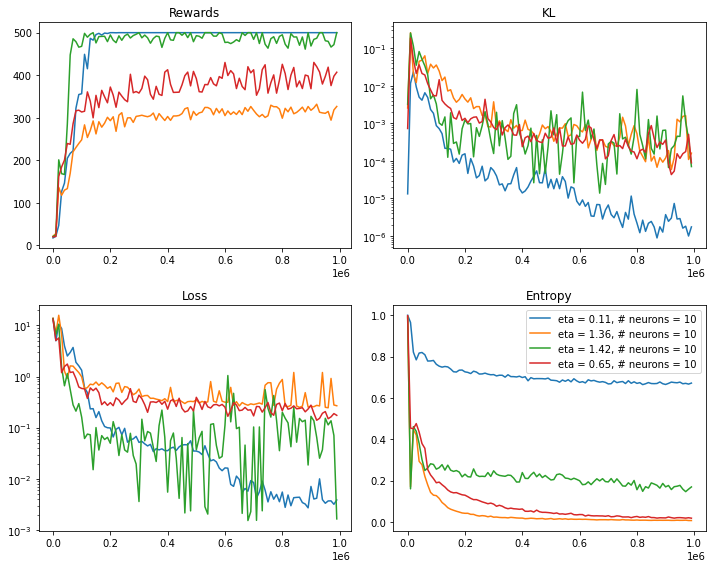

In [347]:
path = "ray_results/run_2022-05-16_15-43-05/"
plot_all(path, limsup=100) 
plt.savefig("./Figures/find_eta_cartpole__"+path.replace("/","_")+".pdf", format='pdf')

Plot average/std across seeds, $\eta=0.1$

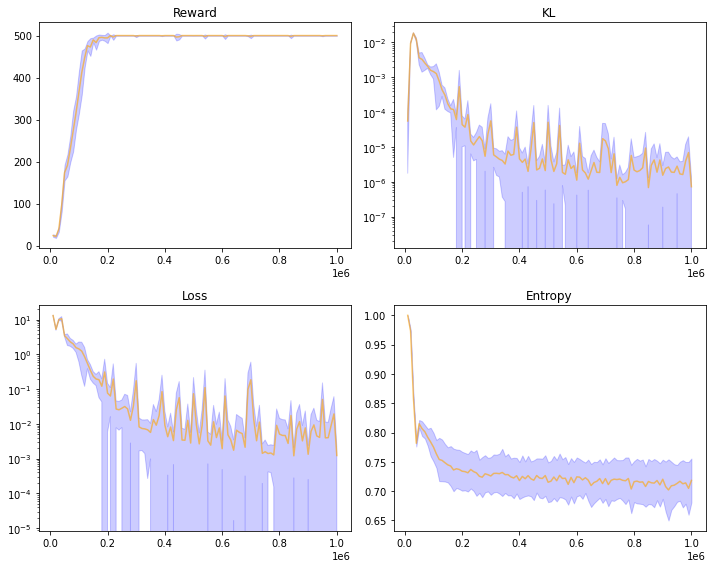

In [348]:
path = "ray_results/run_2022-05-19_14-13-03/"
plot_all_av_std(path,100)
plt.savefig("./Figures/CaRL_eta0.1_cartpole__"+path.replace("/","_")+".pdf", format='pdf')


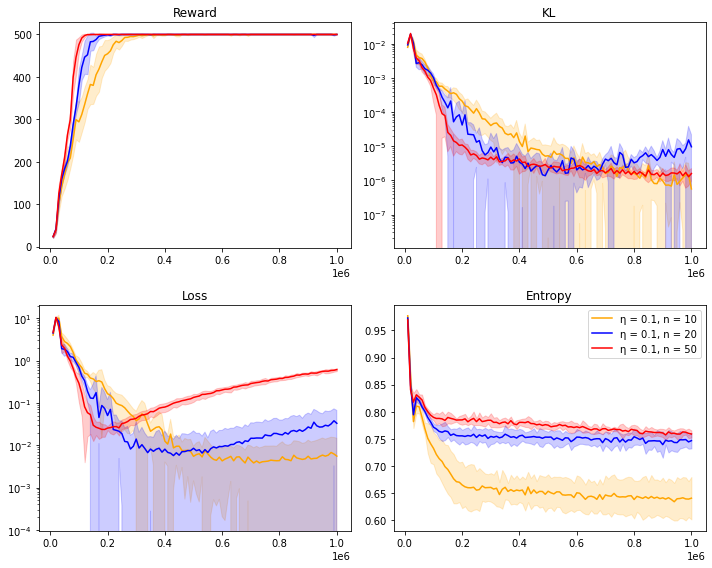

In [349]:

path = "ray_results/run_2022-05-26_13-25-51/"
plot_all_av_std_by_pmts(path, limsup = None, time = False)
plt.savefig("./Figures/CaRL_cartpole__"+path.replace("/","_")+".pdf", format='pdf')

 # Pendulum

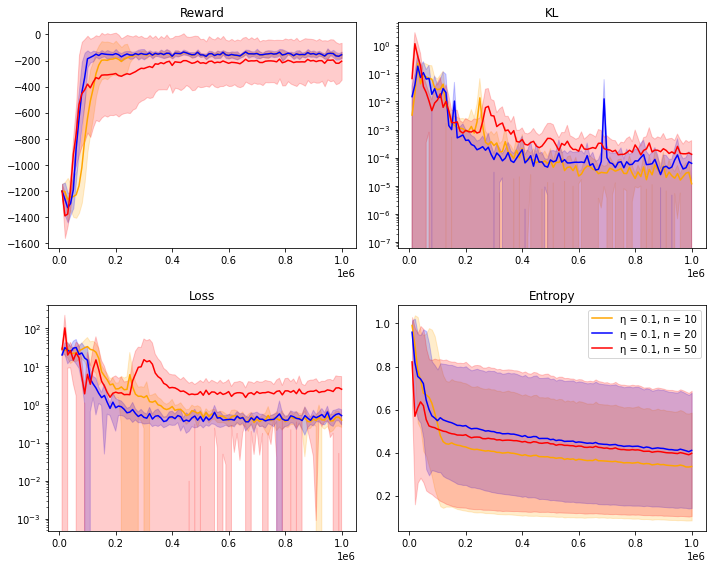

In [350]:

path = "ray_results/run_2022-05-25_12-20-44/"
plot_all_av_std_by_pmts(path, limsup = None, time = False)
plt.savefig("./Figures/CaRL_pendulum__"+path.replace("/","_")+".pdf", format='pdf')

### Search good parameters for Acrobot 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


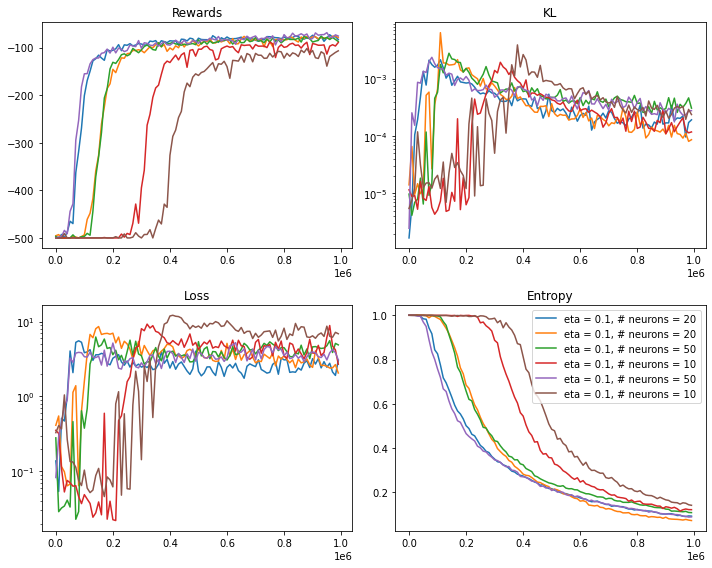

In [351]:
path = "ray_results/run_2022-05-21_12-25-09/"
plot_all(path,figsize=(10,8), single_pmts=["eta", 0.1]) 
plt.savefig("./Figures/find_eta-neurons_acrobot__"+path.replace("/","_")+".pdf", format='pdf')


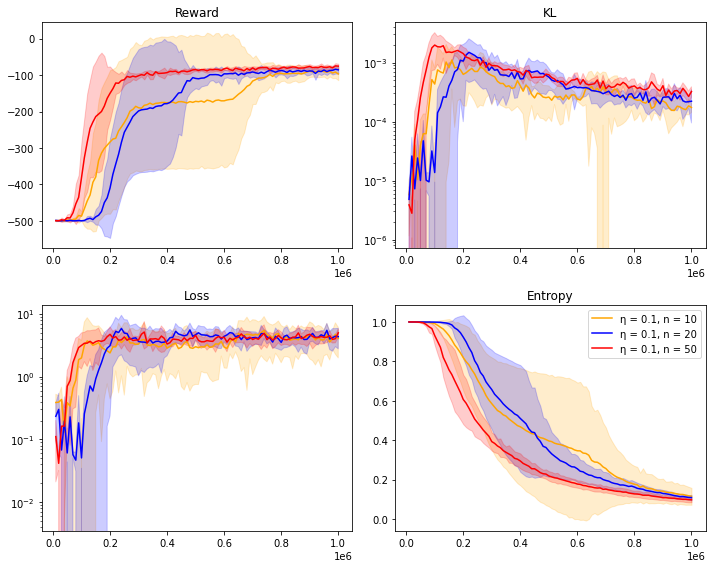

In [352]:
path = "ray_results/run_2022-05-22_21-51-02/"
plot_all_av_std_by_pmts(path, limsup = None, time = False)
plt.savefig("./Figures/CaRL_acrobot__"+path.replace("/","_")+".pdf", format='pdf')

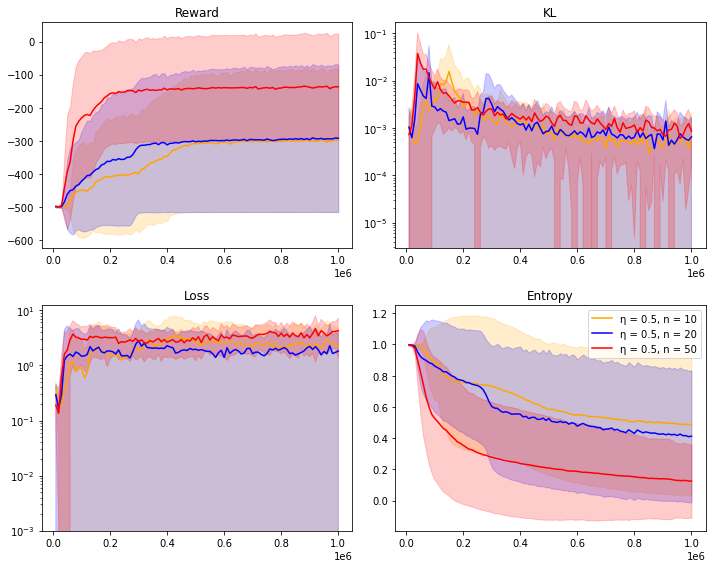

In [353]:
path = 'ray_results/run_2022-05-21_12-25-09/'
plot_all_av_std_by_pmts(path, limsup = None, time = False)
plt.savefig("./Figures/CaRL_acrobot_eta0.5__"+path.replace("/","_")+".pdf", format='pdf')

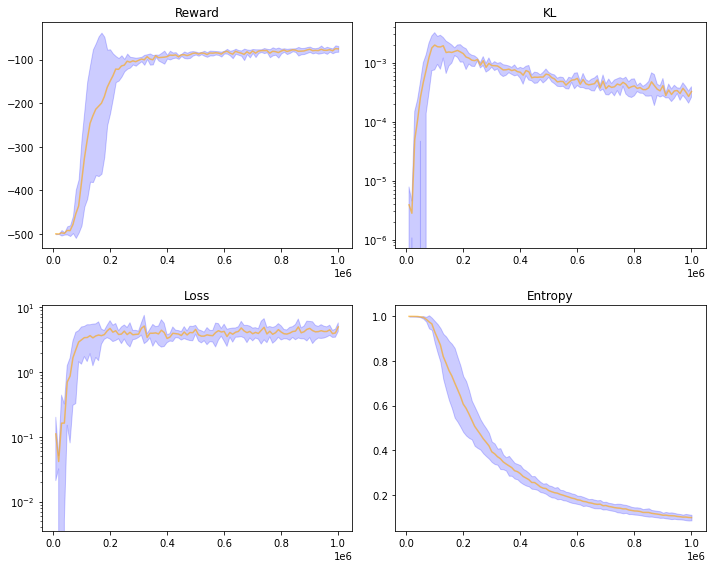

In [354]:
path = "ray_results/run_2022-05-22_21-51-02/"
plot_all_av_std(path, limsup = None, time = False, choose_nb=50)
plt.savefig("./Figures/CaRL_acrobob_50nb__"+path.replace("/","_")+".pdf", format='pdf')

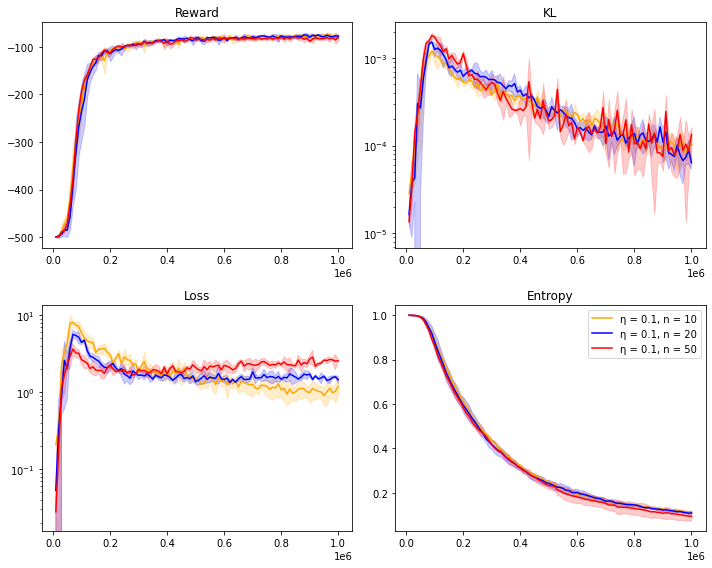

In [355]:
path = "/home/riccardo/Mounted/smithers_folder/ray_results/run_2022-06-01_18-42-11/"
# path = "ray_results/run_2022-05-22_21-51-02/"
plot_all_av_std_by_pmts(path, limsup = None, time = False, choose_eta=0.1)
plt.savefig("./Figures/CaRL_acrobot_opt__"+path.replace("/","_")+".pdf", format='pdf')

# Mountaincar

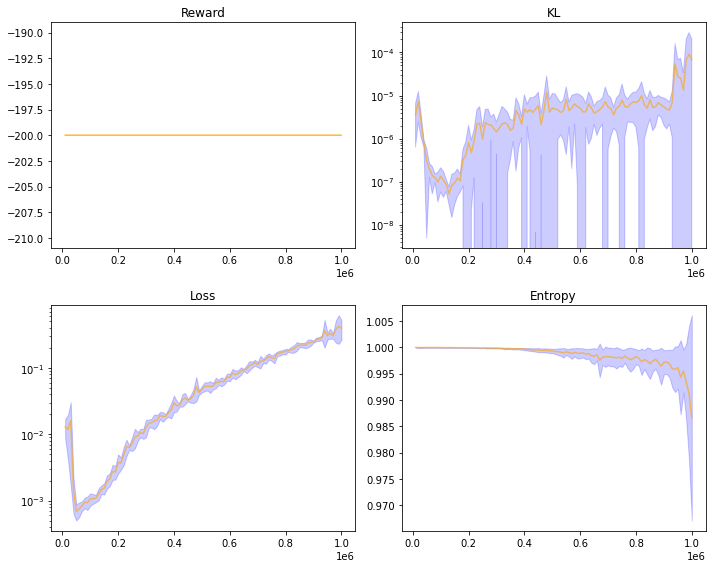

In [356]:
path = "ray_results/run_2022-05-28_18-39-32/"
plot_all_av_std(path, limsup = None, time = False, choose_nb=50)
plt.savefig("./Figures/CaRL_mountaincar__"+path.replace("/","_")+".pdf", format='pdf')

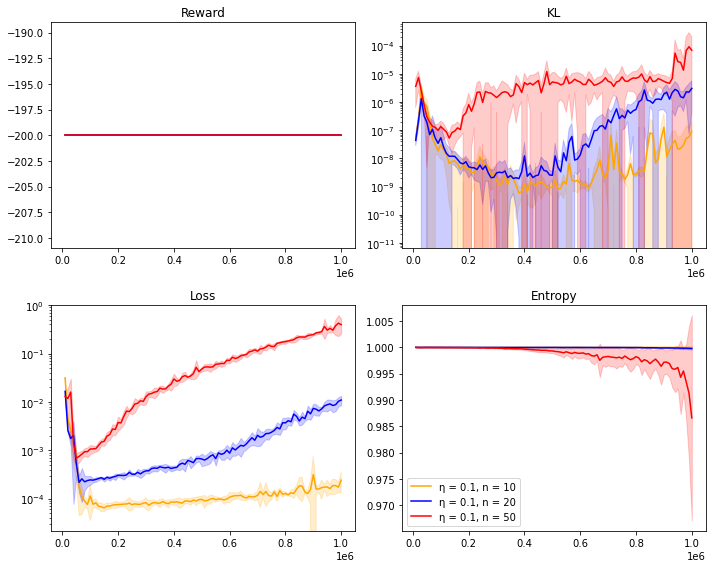

In [357]:
path = "ray_results/run_2022-05-28_18-39-32/"
plot_all_av_std_by_pmts(path, limsup = None, time = False)
plt.savefig("./Figures/CaRL_mountaincar__"+path.replace("/","_")+".pdf", format='pdf')

# MDQN

In [5]:
def plot_reward(path, time= False):
    df = pd.read_csv(path+"/data.csv")
    df = df[df["tag"]=="eval_rewards"]
    df = df.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])
    if time:
        xfit = df["mean"]["dw_time_elapsed"]["eval_rewards"]
    else:
        xfit = df.index  
    yfit = df["mean"]["value"]["eval_rewards"]
    dyfit = df["std"]["value"]["eval_rewards"]
    plt.fill_between(xfit, yfit - dyfit, np.minimum(yfit+dyfit,500), color='blue', alpha=0.2)
    plt.plot(xfit, yfit, color='orange', alpha=0.6)
    plt.title("Reward")

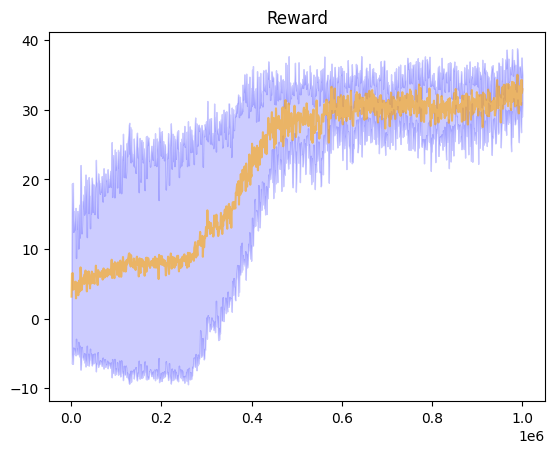

In [6]:
path = "/Users/ashilova/Mounted/smithers/MirrorRL/rlberry_exps/results/solving_freeway/mdqn_minatar/1/manager_data"
plot_reward(path)
# plt.savefig("./Figures/a2c_cartpole_reward_"+path.replace("/","_")+".pdf", format='pdf')


# A2C

In [358]:
def plot_reward(path, time= False):
    df = pd.read_csv(path+"/data.csv")
    df = df[df["tag"]=="eval_rewards"]
    df = df.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])
    if time:
        xfit = df["mean"]["dw_time_elapsed"]["eval_rewards"]
    else:
        xfit = df.index  
    yfit = df["mean"]["value"]["eval_rewards"]
    dyfit = df["std"]["value"]["eval_rewards"]
    plt.fill_between(xfit, yfit - dyfit, np.minimum(yfit+dyfit,500), color='blue', alpha=0.2)
    plt.plot(xfit, yfit, color='orange', alpha=0.6)
    plt.title("Reward")

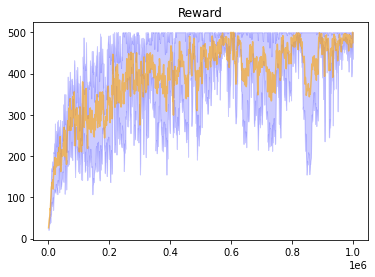

In [359]:
path = "results/solving_cartpole/a2c_cartpole/21/manager_data"
plot_reward(path)
plt.savefig("./Figures/a2c_cartpole_reward_"+path.replace("/","_")+".pdf", format='pdf')


In [360]:
def plot_rlberry_exp(path, time = False, id_env = "cartpole"):
    df = pd.read_csv(path + "/data.csv")
    df = df[(df["tag"]=="eval_rewards") | (df["tag"]=="loss") | (df["tag"]=="kl") | (df["tag"]=="ent")]
    df = df.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    if time:
       xfit = df["mean"]["dw_time_elapsed"]["eval_rewards"]
    else:
        xfit = df.index  
    yfit = df["mean"]["value"]["eval_rewards"]
    dyfit = df["std"]["value"]["eval_rewards"]
    axs[0, 0].fill_between(xfit, yfit - dyfit, np.minimum(yfit+dyfit,500), color='blue', alpha=0.4)
    axs[0, 0].plot(xfit, yfit, color='orange', alpha=0.4)
    axs[0, 0].set_title("Reward")

    if time:
       xfit = df["mean"]["dw_time_elapsed"]["loss"]
    else:
        xfit = df.index  
    yfit = df["mean"]["value"]["loss"]
    dyfit = df["std"]["value"]["loss"]
    axs[1, 0].fill_between(xfit, yfit - dyfit, yfit+dyfit, color='blue', alpha=0.4)
    axs[1, 0].plot(xfit, yfit, color='orange', alpha=0.4)
    axs[1, 0].set_title("Loss")

    if time:
       xfit = df["mean"]["dw_time_elapsed"]["kl"]
    else:
        xfit = df.index  
    yfit = df["mean"]["value"]["kl"]
    dyfit = df["std"]["value"]["kl"]
    axs[0, 1].fill_between(xfit, np.maximum(yfit - dyfit,0), yfit+dyfit, color='blue', alpha=0.4)
    axs[0, 1].plot(xfit, yfit, color='orange', alpha=0.4)
    axs[0, 1].set_title("KL")
    axs[0, 1].set_yscale('log') 

    if time:
       xfit = df["mean"]["dw_time_elapsed"]["ent"]
    else:
        xfit = df.index   
    if id_env == "cartpole":
        yfit = df["mean"]["value"]["ent"]/np.log(2)
        dyfit = df["std"]["value"]["ent"]/np.log(2)
    elif id_env == "acrobot":
        yfit = df["mean"]["value"]["ent"]/np.log(3)
        dyfit = df["std"]["value"]["ent"]/np.log(3)
    axs[1, 1].fill_between(xfit, np.maximum(yfit - dyfit,0), yfit+dyfit, color='blue', alpha=0.4)
    axs[1, 1].plot(xfit, yfit, color='orange', alpha=0.4)
    axs[1, 1].set_title("Entropy")

    fig.tight_layout()

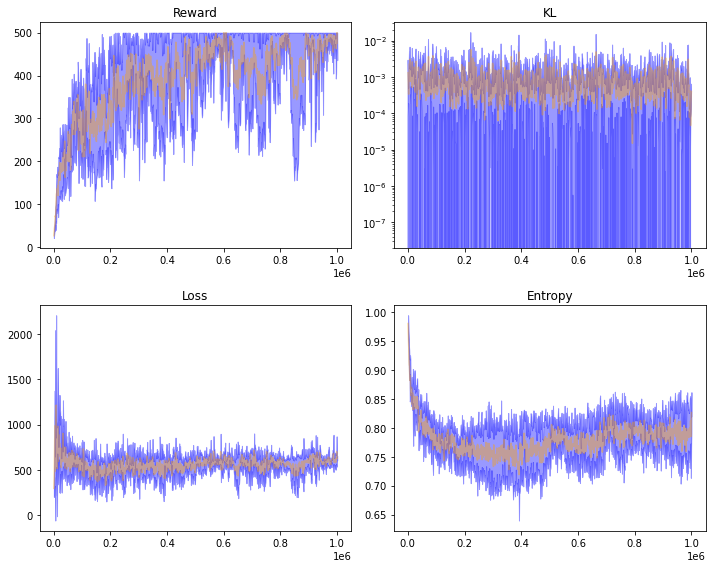

In [361]:
path = "results/solving_cartpole/a2c_cartpole/22/manager_data"
plot_rlberry_exp(path, id_env="cartpole")
plt.savefig("./Figures/a2c_cartpole_"+path.replace("/","_")+".pdf", format='pdf')

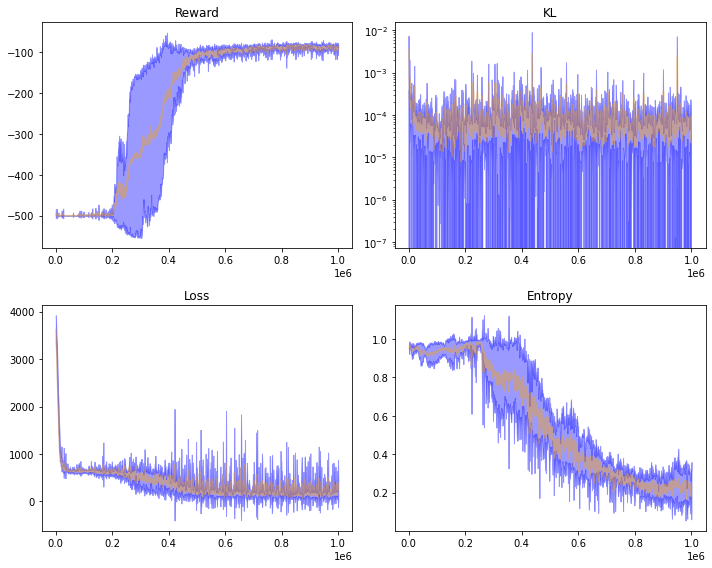

In [362]:
path = "results/solving_acrobot/a2c_cartpole/2/manager_data"
plot_rlberry_exp(path, id_env="acrobot")
plt.savefig("./Figures/a2c_acrobot_"+path.replace("/","_")+".pdf", format='pdf')

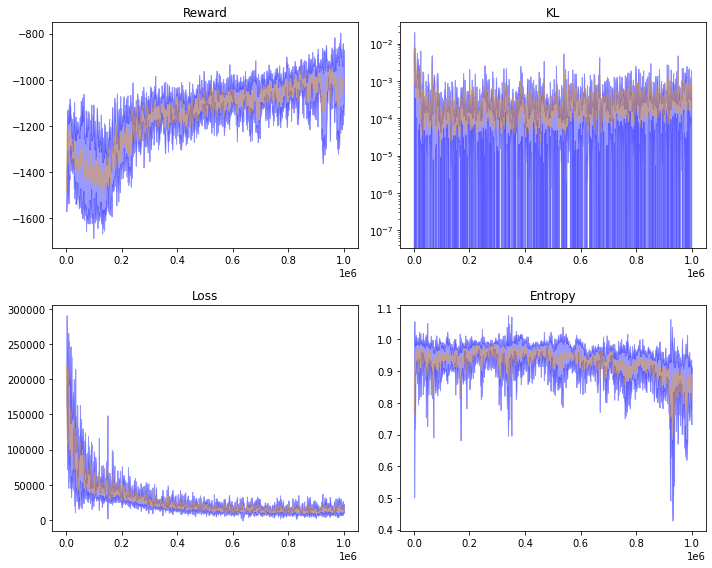

In [363]:
path = "results/solving_pendulum/a2c_pendulum/1/manager_data"
plot_rlberry_exp(path, id_env="acrobot")
plt.savefig("./Figures/a2c_pendulum_"+path.replace("/","_")+".pdf", format='pdf')

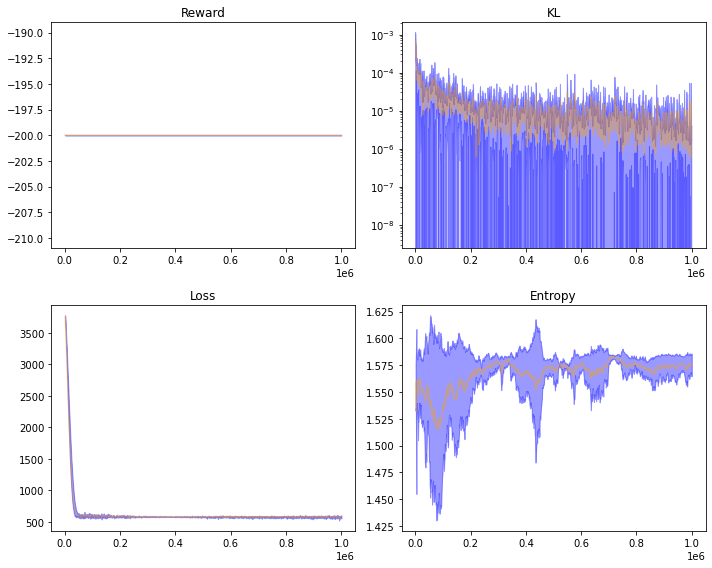

In [364]:
path = "results/solving_mountaincar/a2c_mountaincar/1/manager_data"
plot_rlberry_exp(path)
plt.savefig("./Figures/a2c_mountaincar_"+path.replace("/","_")+".pdf", format='pdf')

### DQN

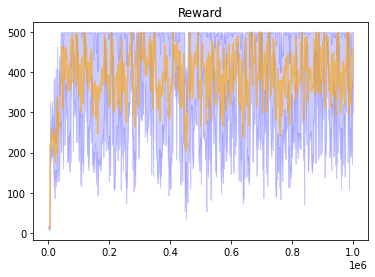

In [365]:
path = "results/solving_cartpole/dqn_cartpole/1/manager_data"
plot_reward(path)
plt.savefig("./Figures/dqn_cartpole_reward_"+path.replace("/","_")+".pdf", format='pdf')

In [366]:
def plot_rlberry_exp_dqn(path, time=False, logy=False, limy=False):

    df = pd.read_csv(path+"/data.csv")
    dfr = df[(df["tag"]=="eval_rewards")]
    dfr = dfr.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])
    fig, (ax1,ax2) = plt.subplots(1, 2,  figsize=(10,4))

    if time:
        xfit = dfr["mean"]["dw_time_elapsed"]["eval_rewards"]
    else:
        xfit  = dfr.index
    yfit = dfr["mean"]["value"]["eval_rewards"]
    dyfit = dfr["std"]["value"]["eval_rewards"]
    ax1.fill_between(xfit, yfit - dyfit, np.minimum(yfit+dyfit,500), color='blue', alpha=0.4)
    ax1.plot(xfit, yfit, color='orange', alpha=0.6)
    ax1.set_title("Reward")
    
    if logy:
        ax1.set_yscale('symlog')
    if limy:
        ax1.set_ylim(-600,0)



    dfl = df[(df["tag"]=="losses/q_loss")]
    dfl = dfl.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])

    if time:
        xfit = dfl["mean"]["dw_time_elapsed"]["losses/q_loss"]
    else:
        xfit = dfl.index
    yfit = dfl["mean"]["value"]["losses/q_loss"]
    dyfit = dfl["std"]["value"]["losses/q_loss"]
    ax2.fill_between(xfit, np.maximum(0,yfit - dyfit), yfit+dyfit, color='blue', alpha=0.4)
    ax2.plot(xfit, yfit, color='orange', alpha=0.4)
    ax2.set_title("Loss")

    fig.tight_layout()


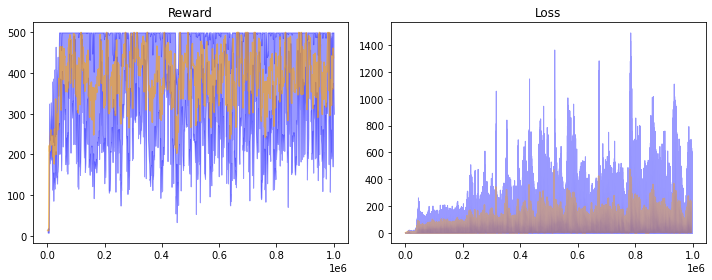

In [367]:
path = "results/solving_cartpole/dqn_cartpole/1/manager_data"
plot_rlberry_exp_dqn(path)
plt.savefig("./Figures/dqn_cartpole_"+path.replace("/","_")+".pdf", format='pdf')

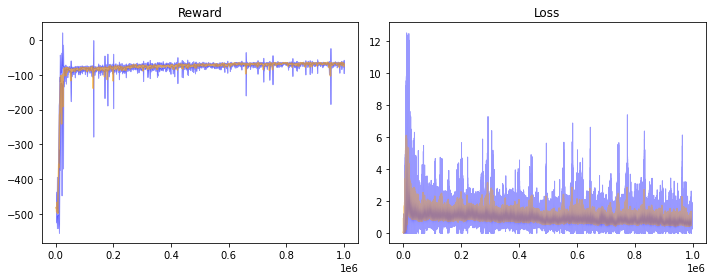

In [368]:
path = "results/solving_acrobot/dqn_acrobot/1/manager_data"
plot_rlberry_exp_dqn(path)
plt.savefig("./Figures/dqn_acrobot_"+path.replace("/","_")+".pdf", format='pdf')


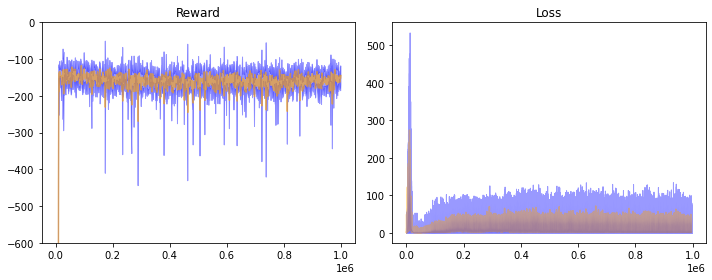

In [369]:
path = "results/solving_pendulum/dqn_pendulum/1/manager_data"
plot_rlberry_exp_dqn(path, limy=True)
plt.savefig("./Figures/dqn_pendulum_"+path.replace("/","_")+".pdf", format='pdf')


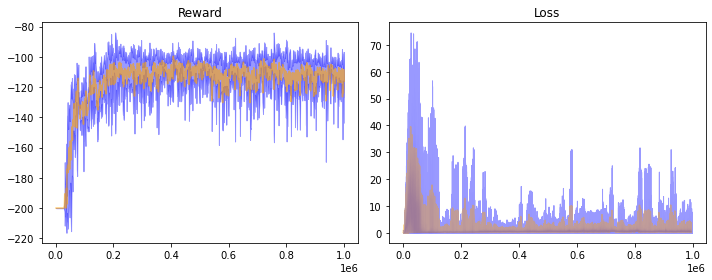

In [370]:
path = "results/solving_mountaincar/dqn_mountaincar/1/manager_data"
plot_rlberry_exp_dqn(path)
plt.savefig("./Figures/dqn_mountaincar_"+path.replace("/","_")+".pdf", format='pdf')

# Comparison Plots

In [2]:
def plot_agents_comparison_reward(path, time = False, limsup = 100):
    # MiCaRl
    all_folders = [f for f in os.listdir(path[0]) if os.path.isdir(os.path.join(path[0], f))]
    df = pd.DataFrame()
    for f in all_folders:
        _df = pd.read_csv(path[0]+f+"/progress.csv")
        with open(path[0]+f+"/params.json") as fpms:
            pms = load(fpms)
        if limsup != None:
            _df = _df[_df["iterations_since_restore"]<limsup]
        _df["eta"] = pms["eta"]
        _df["nb_add_neurone_per_iter"] = pms["nb_add_neurone_per_iter"]
        _df["nb_samp_per_iter"] = pms["nb_samp_per_iter"]
        df = pd.concat([df, _df], ignore_index=True)
    df = df[["nb_samp_per_iter", "nb_add_neurone_per_iter", "eta", 'average_reward', 'q_error_train', "kl", "entropy", "experiment_id", "time_total_s", "time_since_restore", "iterations_since_restore"]]								  
    df = df.pivot_table(index= "iterations_since_restore", aggfunc=[np.mean,  np.std])
    if time:
        xfit = df["mean"]["time_total_s"]
    else:
        xfit = df.index * df["mean"]["nb_samp_per_iter"]
    yfit = df["mean"]["average_reward"]
    dyfit = df["std"]["average_reward"]
    plt.plot(xfit, yfit, alpha=1, label = "MiCaRL", linewidth=3, color='red')


    # dqn
    # limsup = 100
    df = pd.read_csv(path[2]+"/data.csv")
    df = df[df["tag"]=="eval_rewards"]
    df = df.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])
    if time:
        xfit = df["mean"]["dw_time_elapsed"]["eval_rewards"]
    else:
        xfit = df.index  
    yfit = df["mean"]["value"]["eval_rewards"]
    dyfit = df["std"]["value"]["eval_rewards"]
    # plt.fill_between(xfit, yfit - dyfit, np.minimum(yfit+dyfit,500), alpha=0.4)
    plt.plot(xfit, yfit, alpha=0.6, label = "DQN", color='blue')


    # a2c
    limsup = None
    df = pd.read_csv(path[1] + "/data.csv")
    df = df[(df["tag"]=="eval_rewards") | (df["tag"]=="loss") | (df["tag"]=="kl") | (df["tag"]=="ent")]
    df = df.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])
    if time:
        xfit = df["mean"]["dw_time_elapsed"]["eval_rewards"]
    else:
        xfit = df.index  
    yfit = df["mean"]["value"]["eval_rewards"]
    dyfit = df["std"]["value"]["eval_rewards"]
    # plt.fill_between(xfit, yfit - dyfit, np.minimum(yfit+dyfit,500), alpha=0.4)
    plt.plot(xfit, yfit, alpha=0.6, label = "A2C", color='orange')


    # 
    plt.legend()
    plt.title("Reward")


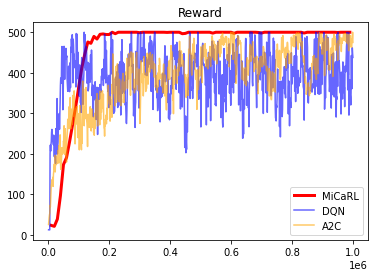

In [372]:
path1 = "ray_results/run_2022-05-19_14-13-03/"
path2 = "results/solving_cartpole/a2c_cartpole/22/manager_data"
path3 = "results/solving_cartpole/dqn_cartpole/1/manager_data"
plot_agents_comparison_reward([path1, path2, path3])
plt.savefig("./Figures/all_rewards"+".pdf", format='pdf')

# ZOOM

In [54]:

def plot_zoom(path, time = False, choose_nb = None, choose_eta=False, id = None, rolling_window = None, every_nb_step= None, ylim = None, xlim = None):
    """
    see next function docstring
    """

    # MiCaRl
    limsup = 100
    all_folders = [f for f in os.listdir(path[0]) if os.path.isdir(os.path.join(path[0], f))]
    df = pd.DataFrame()

    for f in all_folders:
        _df = pd.read_csv(path[0]+f+"/progress.csv")
        with open(path[0]+f+"/params.json") as fpms:
            pms = load(fpms)
        if limsup != None:
            _df = _df[_df.index<limsup]
        _df["eta"] = pms["eta"]
        _df["nb_add_neurone_per_iter"] = pms["nb_add_neurone_per_iter"]
        _df["nb_samp_per_iter"] = pms["nb_samp_per_iter"]
        _df["min_grad_steps_per_iter"] = pms["min_grad_steps_per_iter"]
        df = pd.concat([df, _df], ignore_index=True)
    
    if choose_nb:
        df = df[df["nb_add_neurone_per_iter"]== choose_nb]
    if choose_eta:
        df = df[df["eta"]== choose_eta]
        df = df[df["min_grad_steps_per_iter"]== 10_000]
        df = df[df["eta"]==choose_eta]

        
    df = df[["min_grad_steps_per_iter", "nb_add_neurone_per_iter", "nb_samp_per_iter", "eta", 'average_reward', 'q_error_train', "kl", "entropy", "experiment_id", "time_total_s", "time_since_restore", "training_iteration"]]								  

    # fig, axs = plt.subplots(2, 2, figsize=(10,8))
    for nb in df["nb_add_neurone_per_iter"].unique():
        df_sub = df[df["nb_add_neurone_per_iter"]==nb]
        df_sub = df_sub.pivot_table(index= "training_iteration", aggfunc=[np.mean,  np.std])
        lab = "eta = " + str(pms["eta"])[:4]+ ", " + "# neurons = " + str(nb)

        if time:
            xfit = df_sub["mean"]["time_total_s"]
        else:
            xfit = df_sub.index * df_sub["mean"]["nb_samp_per_iter"]
        yfit = df_sub["mean"]["average_reward"]
        dyfit = df_sub["std"]["average_reward"]
        plt.fill_between(xfit, np.minimum(500,yfit + dyfit), yfit-dyfit, alpha=0.2, color="red")
        plt.plot(xfit, yfit, alpha=0.8, color='red')
        # plt.title("Reward")
        if ylim:    
            ylim_below, ylim_above = ylim[0], ylim[1]
            plt.ylim(ylim_below, ylim_above)
        if xlim:
            xlim_below, xlim_above = xlim[0], xlim[1]
            plt.xlim(xlim_below, xlim_above)
        

    # dqn
    limsup = None
    df = pd.read_csv(path[2]+"/data.csv")

    dfr = df[(df["tag"]=="eval_rewards")]
    dfr = dfr.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])
    if time:
        xfit = dfr["mean"]["dw_time_elapsed"]["eval_rewards"]
    else:
        xfit = average_ser(pd.Series(dfr.index), every_nb_step=every_nb_step, avg = False)
    yfit = average_ser(dfr["mean"]["value"]["eval_rewards"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    dyfit = average_ser(dfr["std"]["value"]["eval_rewards"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    plt.plot(xfit, yfit, alpha=0.8, color='blue')
    plt.fill_between(xfit, yfit - dyfit, np.minimum(yfit+dyfit,500), color = "blue", alpha=0.2)


    # a2c
    norm_dict = {"cartpole": np.log(2) , "acrobot": np.log(3), "pendulum": np.log(3), "mountaincar": np.log(3)}
    limsup = 100
    df = pd.read_csv(path[1] + "/data.csv")
    df = df[(df["tag"]=="eval_rewards") | (df["tag"]=="loss") | (df["tag"]=="kl") | (df["tag"]=="ent")]
    df = df.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])

    if time:
        # xfit = average_ser(df["mean"]["dw_time_elapsed"]["eval_rewards"], rolling_window = 10_000, every_nb_step = 10_000, avg=True)
        xfit = df["mean"]["dw_time_elapsed"]["eval_rewards"]
        # TODO line above is not working
    else:        
        xfit = average_ser(pd.Series(df.index), every_nb_step=every_nb_step, avg = False)
    yfit = average_ser(df["mean"]["value"]["eval_rewards"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    dyfit = average_ser(df["std"]["value"]["eval_rewards"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    plt.fill_between(xfit, yfit - dyfit, np.minimum(500, yfit+dyfit), color = "orange", alpha=0.2)
    plt.plot(xfit, yfit, alpha=0.8, color= 'orange')


    # 
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='r', label='MiCaRL'),
                        Line2D([0], [0], color='b', label='DQN'),
                        Line2D([0], [0], color='orange', label='A2C')]
    plt.legend(handles=legend_elements)



def average_ser(series, rolling_window=10, every_nb_step=10_000, avg = True):
    """
        rolling_window : window in which you compute average usefuld values are 1 to leave data as they are, and 10
                            to use together with every_nb_step = 10_000 to average every 10_000 steps all observations
                            in the middle  
        every_nb_step : take data every number of steps in the environement, data are saved every 1000 wich is the 
                        thinnes grain, so if you want to take data every 10_000 steps you should set every_nb_step to 
                        10_000 and you get 100 data points that are just the initial ones or averaged if rolling
                        window is != 1
    """
    if avg:
        s = series.rolling(rolling_window).mean()
        return s[series.index % every_nb_step ==0]
    else:
        return series[series % every_nb_step ==0] 

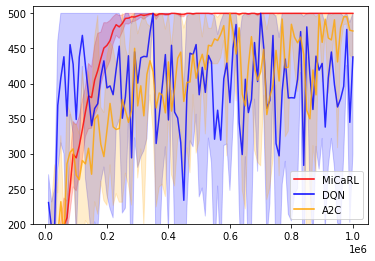

In [58]:
path1 = "ray_results/run_2022-05-26_13-25-51/"
path2 = "results/solving_cartpole/a2c_cartpole/22/manager_data"
path3 = "results/solving_cartpole/dqn_cartpole/1/manager_data"
plot_zoom([path1, path2, path3], choose_nb = 10, id="cartpole", rolling_window=1, every_nb_step = 10_000, ylim=[200,510])
plt.savefig("./Figures/all_agents_cartpole_single_zoom"+".pdf", format='pdf')

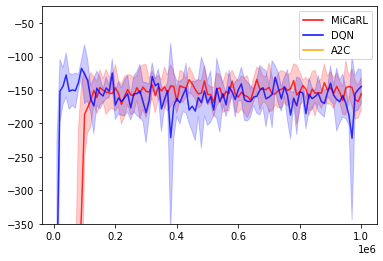

In [63]:
path1 = "ray_results/run_2022-05-25_12-20-44/"
path2 = "results/solving_pendulum/a2c_pendulum/1/manager_data"
path3 = "results/solving_pendulum/dqn_pendulum/1/manager_data"
plot_zoom([path1,path2, path3], choose_nb=20, id = "pendulum",  rolling_window=1, every_nb_step = 10_000, ylim=[-350,-25])
plt.savefig("./Figures/all_agents_pendulum_single_zoom"+".pdf", format='pdf')

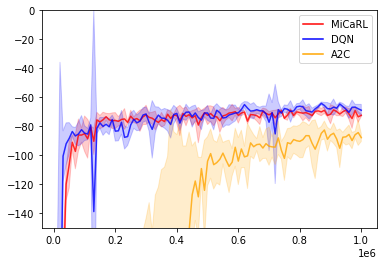

In [60]:
path1 = "/home/riccardo/Mounted/smithers_folder/ray_results/run_2022-06-01_18-42-11/"
path2 = "results/solving_acrobot/a2c_cartpole/2/manager_data"
path3 = "results/solving_acrobot/dqn_acrobot/1/manager_data"
plot_zoom([path1,path2, path3], choose_nb=50, choose_eta=1, id="acrobot", rolling_window=1, every_nb_step = 10_000, ylim=[-150,0])
plt.savefig("./Figures/all_agents_acrobot_zoom"+".pdf", format='pdf')

# Comparison plots

In [61]:
def plot_agents_comparison(path, time = False, choose_nb = None, choose_eta=False, id = None, rolling_window = None, every_nb_step= None):
    """
    see next function docstring
    """
    # MiCaRl
    limsup = 100
    all_folders = [f for f in os.listdir(path[0]) if os.path.isdir(os.path.join(path[0], f))]
    df = pd.DataFrame()

    for f in all_folders:
        _df = pd.read_csv(path[0]+f+"/progress.csv")
        with open(path[0]+f+"/params.json") as fpms:
            pms = load(fpms)
        if limsup != None:
            _df = _df[_df.index<limsup]
        _df["eta"] = pms["eta"]
        _df["nb_add_neurone_per_iter"] = pms["nb_add_neurone_per_iter"]
        _df["nb_samp_per_iter"] = pms["nb_samp_per_iter"]
        _df["min_grad_steps_per_iter"] = pms["min_grad_steps_per_iter"]
        df = pd.concat([df, _df], ignore_index=True)
    
    if choose_nb:
        df = df[df["nb_add_neurone_per_iter"]== choose_nb]
    if choose_eta:
        df = df[df["eta"]== choose_eta]
        df = df[df["min_grad_steps_per_iter"]== 10_000]
        df = df[df["eta"]==choose_eta]

        
    df = df[["min_grad_steps_per_iter", "nb_add_neurone_per_iter", "nb_samp_per_iter", "eta", 'average_reward', 'q_error_train', "kl", "entropy", "experiment_id", "time_total_s", "time_since_restore", "training_iteration"]]								  

    fig, axs = plt.subplots(2, 2, figsize=(10,8))
    for nb in df["nb_add_neurone_per_iter"].unique():
        df_sub = df[df["nb_add_neurone_per_iter"]==nb]
        df_sub = df_sub.pivot_table(index= "training_iteration", aggfunc=[np.mean,  np.std])
        lab = "eta = " + str(pms["eta"])[:4]+ ", " + "# neurons = " + str(nb)

        if time:
            xfit = df_sub["mean"]["time_total_s"]
        else:
            xfit = df_sub.index * df_sub["mean"]["nb_samp_per_iter"]
        yfit = df_sub["mean"]["average_reward"]
        dyfit = df_sub["std"]["average_reward"]
        axs[0, 0].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color="red")
        axs[0, 0].plot(xfit, yfit, alpha=0.8, color='red')
        axs[0, 0].set_title("Reward")
        
        yfit = df_sub["mean"]["q_error_train"]
        dyfit = df_sub["std"]["q_error_train"]
        axs[1, 0].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color="red")
        axs[1, 0].plot(xfit, yfit, alpha=0.8, color='red')
        axs[1, 0].set_title("Loss")
        axs[1, 0].set_yscale('log')

        yfit = df_sub["mean"]["kl"]
        dyfit = df_sub["std"]["kl"]
        axs[0, 1].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color="red")
        axs[0, 1].plot(xfit, yfit, alpha=0.8, color='red')
        axs[0, 1].set_title("KL") 
        axs[0, 1].set_yscale('log')

        yfit = df_sub["mean"]["entropy"]
        dyfit = df_sub["std"]["entropy"]
        axs[1, 1].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color="red")
        axs[1, 1].plot(xfit, yfit, alpha=0.8, color='red')
        axs[1, 1].set_title("Entropy")


    # dqn
    limsup = None
    df = pd.read_csv(path[2]+"/data.csv")

    dfr = df[(df["tag"]=="eval_rewards")]
    dfr = dfr.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])
    if time:
        xfit = dfr["mean"]["dw_time_elapsed"]["eval_rewards"]
    else:
        # print(dfr.index)
        xfit = average_ser(pd.Series(dfr.index), every_nb_step=every_nb_step, avg = False)
    yfit = average_ser(dfr["mean"]["value"]["eval_rewards"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    dyfit = average_ser(dfr["std"]["value"]["eval_rewards"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    axs[0, 0].plot(xfit, yfit, alpha=0.8, color='blue')
    axs[0, 0].fill_between(xfit, yfit - dyfit, np.minimum(yfit+dyfit,500), color = "blue", alpha=0.2)



    dfl = df[(df["tag"]=="losses/q_loss")]
    dfl = dfl.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])
    if time:
        xfit = dfl["mean"]["dw_time_elapsed"]["losses/q_loss"]
    else:
        xfit = average_ser(pd.Series(dfl.index), every_nb_step=every_nb_step, avg = False)
    yfit = average_ser(dfl["mean"]["value"]["losses/q_loss"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    dyfit = average_ser(dfl["std"]["value"]["losses/q_loss"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    axs[1, 0].plot(xfit, yfit, alpha=0.8, color='blue')
    axs[1, 0].fill_between(xfit, yfit - dyfit, yfit+dyfit, color = "blue", alpha=0.2)
    # just to plot legend correctly
    axs[0,1].plot(0, 0.6, alpha=0.6, color='blue')
    axs[1,1].plot(0, 0.6, alpha=0.6, color='blue')



    # a2c
    norm_dict = {"cartpole": np.log(2) , "acrobot": np.log(3), "pendulum": np.log(3), "mountaincar": np.log(3)}
    norm_entropy = norm_dict[id] 
    limsup = 100
    df = pd.read_csv(path[1] + "/data.csv")
    df = df[(df["tag"]=="eval_rewards") | (df["tag"]=="loss") | (df["tag"]=="kl") | (df["tag"]=="ent")]
    df = df.pivot_table(index= "global_step", columns="tag", aggfunc=[np.mean,  np.std])

    if time:
        # xfit = average_ser(df["mean"]["dw_time_elapsed"]["eval_rewards"], rolling_window = 10_000, every_nb_step = 10_000, avg=True)
        xfit = df["mean"]["dw_time_elapsed"]["eval_rewards"]
        # TODO line above is not working
    else:        
        xfit = average_ser(pd.Series(df.index), every_nb_step=every_nb_step, avg = False)
    yfit = average_ser(df["mean"]["value"]["eval_rewards"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    dyfit = average_ser(df["std"]["value"]["eval_rewards"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    axs[0, 0].fill_between(xfit, yfit - dyfit, np.minimum(500, yfit+dyfit), color = "orange", alpha=0.2)
    axs[0, 0].plot(xfit, yfit, alpha=0.8, color= 'orange')

    if time:
       xfit = df["mean"]["dw_time_elapsed"]["loss"]  
    yfit = average_ser(df["mean"]["value"]["loss"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    dyfit = average_ser(df["std"]["value"]["loss"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    axs[1, 0].fill_between(xfit, yfit - dyfit, yfit+dyfit, color = "orange", alpha=0.2)
    axs[1, 0].plot(xfit, yfit, alpha=0.8, color= 'orange')
    
    if time:
       xfit = df["mean"]["dw_time_elapsed"]["kl"] 
    yfit = average_ser(df["mean"]["value"]["kl"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    dyfit = average_ser(df["std"]["value"]["kl"], rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    axs[0, 1].fill_between(xfit, yfit - dyfit, yfit+dyfit, color='orange', alpha=0.2)
    axs[0, 1].plot(xfit, yfit, alpha=0.8, color= 'orange')
    
    if time:
       xfit = df["mean"]["dw_time_elapsed"]["ent"] 
    yfit = average_ser( df["mean"]["value"]["ent"]/norm_entropy, rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    dyfit = average_ser(df["std"]["value"]["ent"]/norm_entropy, rolling_window=rolling_window, every_nb_step = every_nb_step, avg=True)
    axs[1, 1].fill_between(xfit, yfit - dyfit, yfit+dyfit, color='orange', alpha=0.2)
    axs[1, 1].plot(xfit, yfit, alpha=0.8, color= 'orange')


    # 
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='r', label='MiCaRL'),
                        Line2D([0], [0], color='b', label='DQN'),
                        Line2D([0], [0], color='orange', label='A2C')]
    plt.legend(handles=legend_elements)



def average_ser(series, rolling_window=10, every_nb_step=10_000, avg = True):
    """
        rolling_window : window in which you compute average usefuld values are 1 to leave data as they are, and 10
                            to use together with every_nb_step = 10_000 to average every 10_000 steps all observations
                            in the middle  
        every_nb_step : take data every number of steps in the environement, data are saved every 1000 wich is the 
                        thinnes grain, so if you want to take data every 10_000 steps you should set every_nb_step to 
                        10_000 and you get 100 data points that are just the initial ones or averaged if rolling
                        window is != 1
    """
    if avg:
        s = series.rolling(rolling_window).mean()
        return s[series.index % every_nb_step ==0]
    else:
        return series[series % every_nb_step ==0] 

### Cartpole

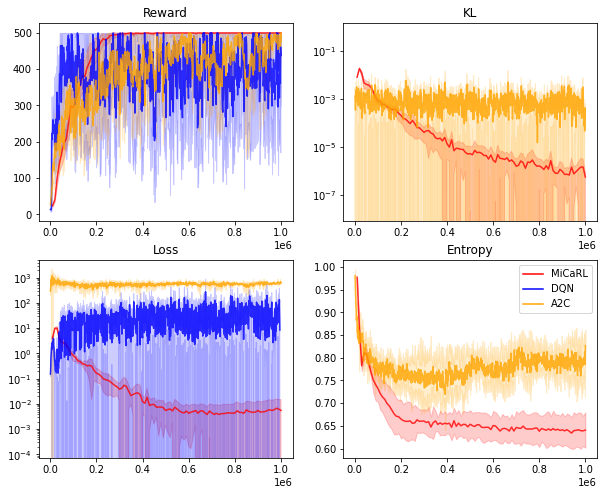

In [3]:
path1 = "ray_results/run_2022-05-26_13-25-51/"
path2 = "results/solving_cartpole/a2c_cartpole/22/manager_data"
path3 = "results/solving_cartpole/dqn_cartpole/1/manager_data"
plot_agents_comparison([path1, path2, path3], choose_nb = 10, id="cartpole", rolling_window=1, every_nb_step = 1000)
plt.savefig("./Figures/all_agents_cartpole"+".pdf", format='pdf')

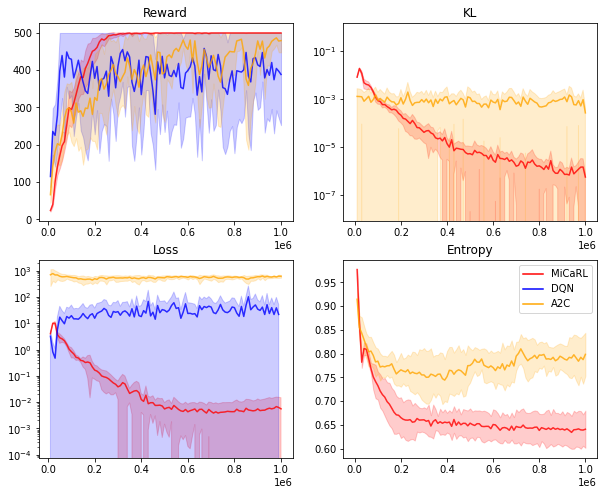

In [4]:
path1 = "ray_results/run_2022-05-26_13-25-51/"
path2 = "results/solving_cartpole/a2c_cartpole/22/manager_data"
path3 = "results/solving_cartpole/dqn_cartpole/1/manager_data"
plot_agents_comparison([path1, path2, path3], choose_nb = 10, id="cartpole", rolling_window=10, every_nb_step = 10_000)
plt.savefig("./Figures/all_agents_cartpole_averaged"+".pdf", format='pdf')

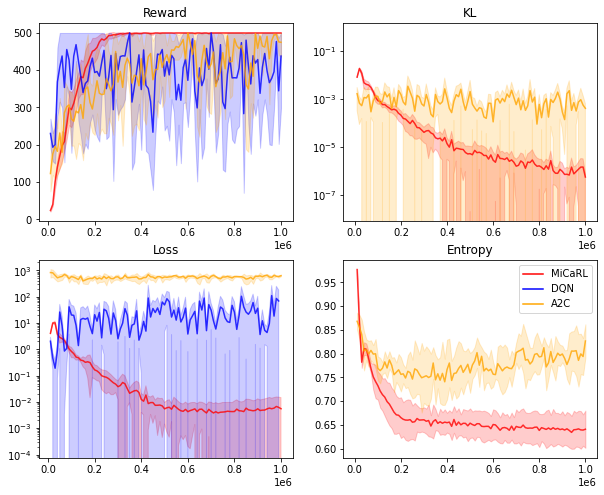

In [5]:
path1 = "ray_results/run_2022-05-26_13-25-51/"
path2 = "results/solving_cartpole/a2c_cartpole/22/manager_data"
path3 = "results/solving_cartpole/dqn_cartpole/1/manager_data"
plot_agents_comparison([path1, path2, path3], choose_nb = 10, id="cartpole", rolling_window=1, every_nb_step = 10_000)
plt.savefig("./Figures/all_agents_cartpole_single"+".pdf", format='pdf')

### Acrobot

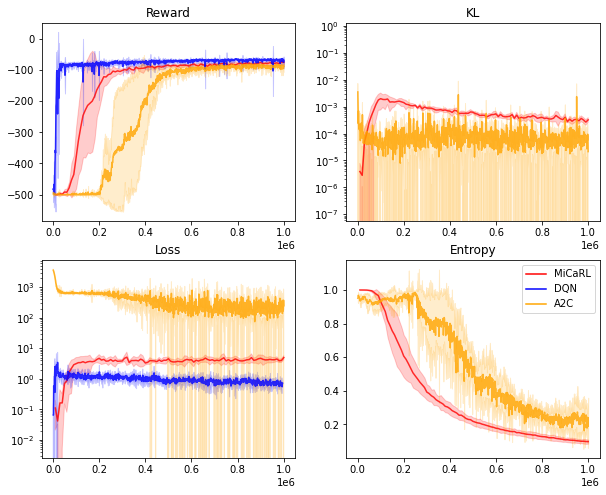

In [6]:
path1 = "ray_results/run_2022-05-22_21-51-02/"
path2 = "results/solving_acrobot/a2c_cartpole/2/manager_data"
path3 = "results/solving_acrobot/dqn_acrobot/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=50, id="acrobot", rolling_window=1, every_nb_step = 1000)
plt.savefig("./Figures/all_agents_acrobot"+".pdf", format='pdf')

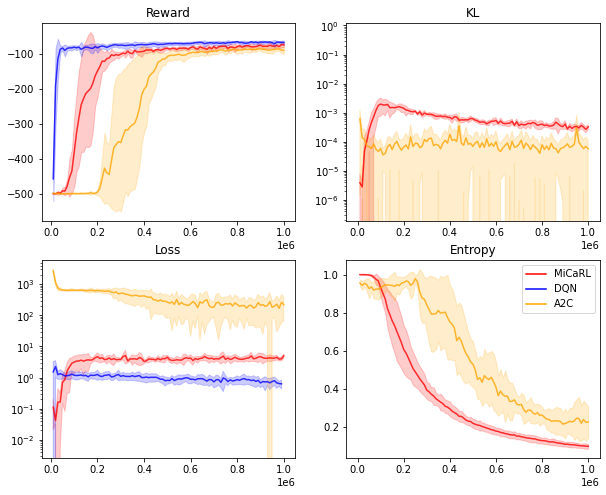

In [7]:
path1 = "ray_results/run_2022-05-22_21-51-02/"
path2 = "results/solving_acrobot/a2c_cartpole/2/manager_data"
path3 = "results/solving_acrobot/dqn_acrobot/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=50, id="acrobot", rolling_window=10, every_nb_step = 10_000)
plt.savefig("./Figures/all_agents_acrobot_averaged"+".pdf", format='pdf')

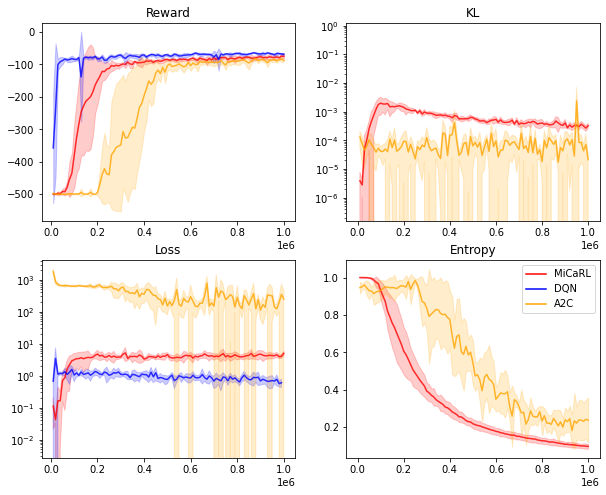

In [8]:
path1 = "ray_results/run_2022-05-22_21-51-02/"
path2 = "results/solving_acrobot/a2c_cartpole/2/manager_data"
path3 = "results/solving_acrobot/dqn_acrobot/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=50, id="acrobot", rolling_window=1, every_nb_step = 10_000)
plt.savefig("./Figures/all_agents_acrobot_single_smithers"+".pdf", format='pdf')

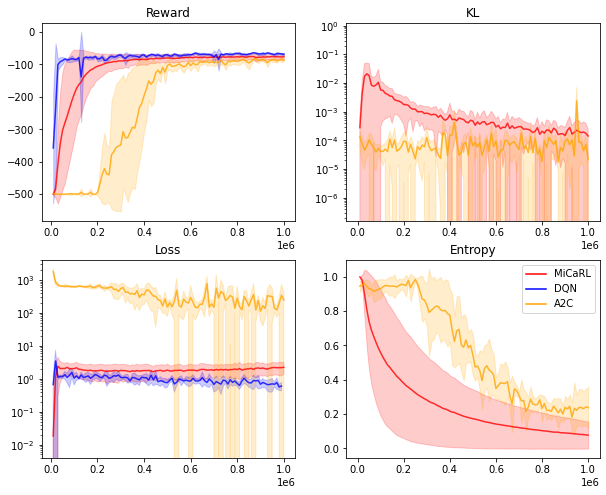

In [9]:
path1 = "/home/riccardo/Mounted/smithers_folder/ray_results/run_2022-06-01_18-42-11/"
path2 = "results/solving_acrobot/a2c_cartpole/2/manager_data"
path3 = "results/solving_acrobot/dqn_acrobot/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=50, id="acrobot", rolling_window=1, every_nb_step = 10_000)
plt.savefig("./Figures/all_agents_acrobot_single"+".pdf", format='pdf')

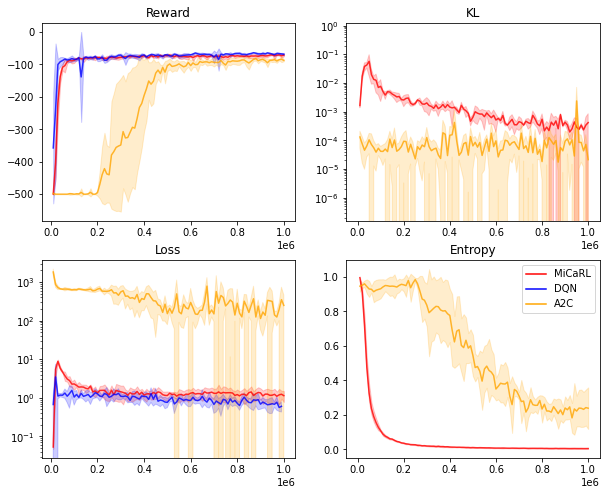

In [10]:
path1 = "/home/riccardo/Mounted/smithers_folder/ray_results/run_2022-06-01_18-42-11/"
path2 = "results/solving_acrobot/a2c_cartpole/2/manager_data"
path3 = "results/solving_acrobot/dqn_acrobot/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=20, choose_eta=1, id="acrobot", rolling_window=1, every_nb_step = 10_000)
plt.savefig("./Figures/all_agents_acrobot_single_20neurones"+".pdf", format='pdf')

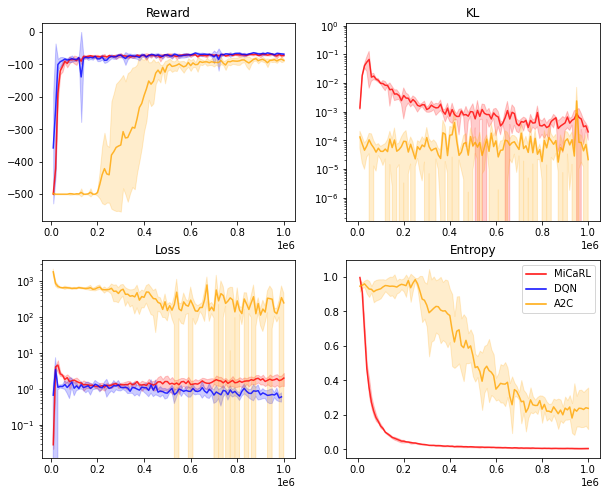

In [11]:
path1 = "/home/riccardo/Mounted/smithers_folder/ray_results/run_2022-06-01_18-42-11/"
path2 = "results/solving_acrobot/a2c_cartpole/2/manager_data"
path3 = "results/solving_acrobot/dqn_acrobot/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=50, choose_eta=1, id="acrobot", rolling_window=1, every_nb_step = 10_000)
plt.savefig("./Figures/all_agents_acrobot_single_eta1_50neurones"+".pdf", format='pdf')

### Pendulum

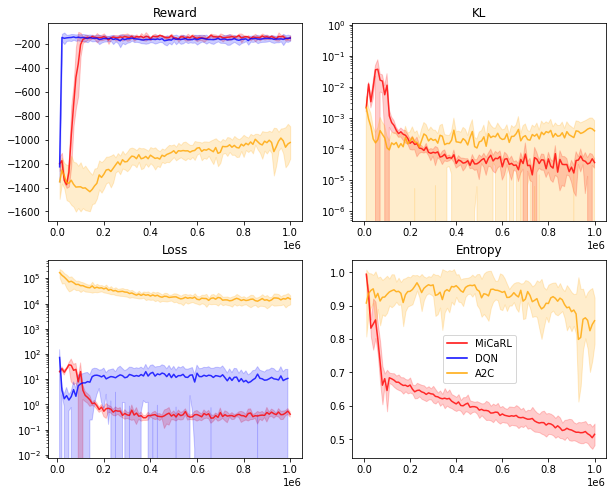

In [386]:
path1 = "ray_results/run_2022-05-25_12-20-44/"
path2 = "results/solving_pendulum/a2c_pendulum/1/manager_data"
path3 = "results/solving_pendulum/dqn_pendulum/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=20, id = "pendulum",  rolling_window=10, every_nb_step = 10_000)
plt.savefig("./Figures/all_agents_pendulum_averaged"+".pdf", format='pdf')

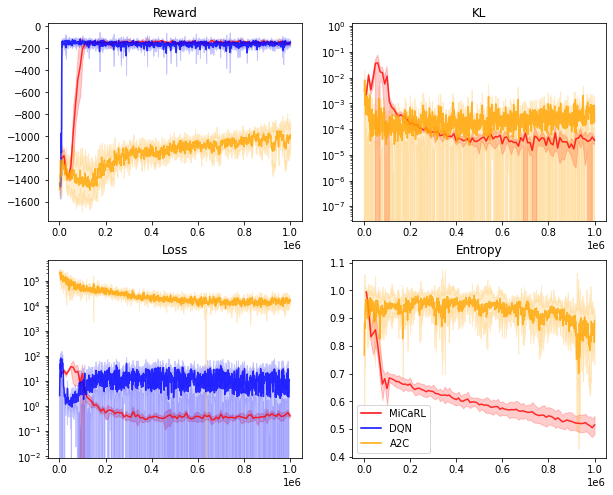

In [387]:
path1 = "ray_results/run_2022-05-25_12-20-44/"
path2 = "results/solving_pendulum/a2c_pendulum/1/manager_data"
path3 = "results/solving_pendulum/dqn_pendulum/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=20, id = "pendulum",  rolling_window=1, every_nb_step = 1000)
plt.savefig("./Figures/all_agents_pendulum"+".pdf", format='pdf')

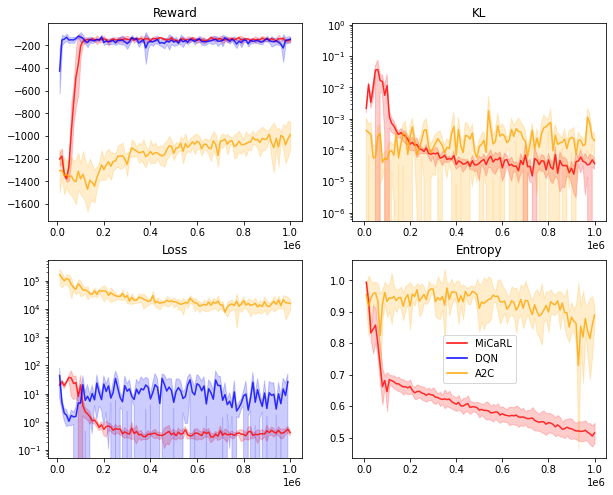

In [388]:
path1 = "ray_results/run_2022-05-25_12-20-44/"
path2 = "results/solving_pendulum/a2c_pendulum/1/manager_data"
path3 = "results/solving_pendulum/dqn_pendulum/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=20, id = "pendulum",  rolling_window=1, every_nb_step = 10_000)
plt.savefig("./Figures/all_agents_pendulum_single"+".pdf", format='pdf')

### Mountaincar

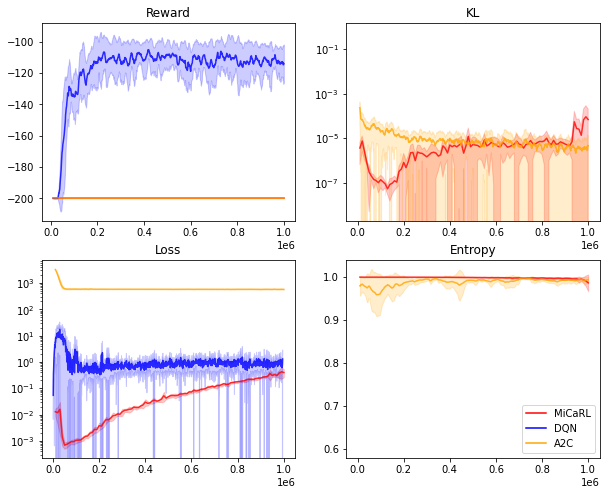

In [389]:
path1 = "ray_results/run_2022-05-28_18-39-32/"
path2 = "results/solving_mountaincar/a2c_mountaincar/1/manager_data"
path3 = "results/solving_mountaincar/dqn_mountaincar/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=50, id="mountaincar",  rolling_window=10, every_nb_step = 1000)
plt.savefig("./Figures/all_agents_mountaincar_averaged"+".pdf", format='pdf')

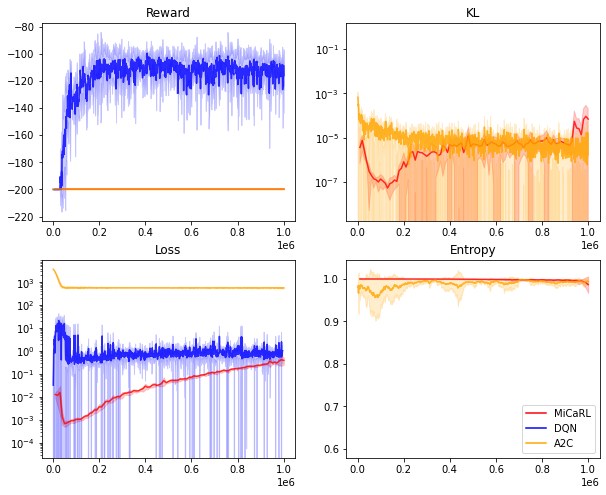

In [390]:
path1 = "ray_results/run_2022-05-28_18-39-32/"
path2 = "results/solving_mountaincar/a2c_mountaincar/1/manager_data"
path3 = "results/solving_mountaincar/dqn_mountaincar/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=50, id="mountaincar",  rolling_window=1, every_nb_step = 1000)
plt.savefig("./Figures/all_agents_mountaincar"+".pdf", format='pdf')

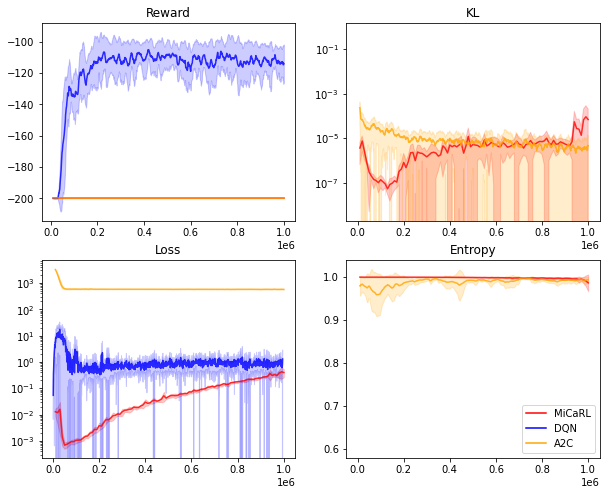

In [391]:
path1 = "ray_results/run_2022-05-28_18-39-32/"
path2 = "results/solving_mountaincar/a2c_mountaincar/1/manager_data"
path3 = "results/solving_mountaincar/dqn_mountaincar/1/manager_data"
plot_agents_comparison([path1,path2, path3], choose_nb=50, id="mountaincar",  rolling_window=10, every_nb_step = 1000)
plt.savefig("./Figures/all_agents_mountaincar_single"+".pdf", format='pdf')

### CC-LSPI

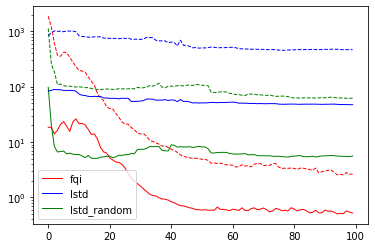

In [164]:
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
from matplotlib.lines import Line2D

files = [
            "errors_pendulum_fqi.npy",
            "errors_pendulum_lstd.npy",
            "errors_pendulum_lstd_random.npy"
        ]

c_cyc = cycler(color = list('rgb')) 
ls_cyc = cycler(linestyle=['solid', 'dashed'])
plt_cycle = c_cyc * ls_cyc * cycler(linewidth=[1.])
                        
d_msbe = []
d_mse = []
for f in files:
    data = np.load(f, allow_pickle=True).item()
    d_msbe.append(data["msbe"]) 
    d_mse.append(data["mse"]) 

for i, pmts in enumerate(plt_cycle):
    if i%2 == 0:
        plt.semilogy(d_msbe[i//2], **pmts)
    else:
        plt.semilogy(d_mse[i//2], **pmts)

legend_elements = [Line2D([0], [0], color='r', label='fqi', linewidth=1.),
                    Line2D([0], [0], color='b', label='lstd', linewidth=1.),
                    Line2D([0], [0], color='g', label='lstd_random', linewidth=1.)]
plt.legend(handles=legend_elements)
plt.savefig("./Figures/comparison_fqi_lstd_training_errors"+".pdf", format='pdf')


### Bellman complete regularization Experiment

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
os.getcwd()
from json import load

In [41]:
def plot_all_micarl(path, limsup = None, figsize=(10,8), single_pmts = False, time = False):

    all_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    fig, axs = plt.subplots(2, 2, figsize=figsize)
    for f in all_folders:
        df = pd.read_csv(path+f+"/progress.csv")
        with open(path+f+"/params.json") as fpms:
            pms = load(fpms)
            lab = "eta = " + str(pms["eta"])[:4]+ ", " + "lambda = " + str(pms["lamda"])
        
        if limsup != None:
            df = df[df.index<limsup]

        if time:
            xfit = df["time_total_s"]
        else:
            xfit = df.index * pms["nb_samp_per_iter"]
        if not single_pmts or pms[single_pmts[0]] == single_pmts[1]:
            axs[0, 0].plot(xfit , df["average_reward"], label=lab)
            axs[0, 0].set_title("Rewards")
            axs[1, 0].plot(xfit , df["q_error_train"], label=lab)
            axs[1, 0].set_title("Loss")
            axs[1, 0].set_yscale('log')
            axs[0, 1].plot(xfit , df["kl"], label=lab)
            axs[0, 1].set_title("KL")
            axs[0, 1].set_yscale('log')
            axs[1, 1].plot(xfit , df["entropy"], label=lab)
            axs[1, 1].set_title("Entropy")
        # plt.legend()
    fig.tight_layout()

In [42]:
def plot_all_av_std(path, limsup = None, time = False, choose_nb=False):
    all_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    df = pd.DataFrame()
    for f in all_folders:
        _df = pd.read_csv(path+f+"/progress.csv")
        with open(path+f+"/params.json") as fpms:
            pms = load(fpms)
        if limsup != None:
            _df = _df[_df.index<limsup]
        _df["eta"] = pms["eta"]
        _df["nb_add_neurone_per_iter"] = pms["nb_add_neurone_per_iter"]
        _df["nb_samp_per_iter"] = pms["nb_samp_per_iter"]
        df = pd.concat([df, _df], ignore_index=True)

    if choose_nb:
        df = df[df["nb_add_neurone_per_iter"]==choose_nb]

    df = df[["nb_samp_per_iter", "nb_add_neurone_per_iter", "eta", 'average_reward', 'q_error_train', "kl", "entropy", "experiment_id", "time_total_s", "time_since_restore", "iterations_since_restore"]]								  
    df = df.pivot_table(index= "iterations_since_restore", aggfunc=[np.mean,  np.std])
    
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    if time:
        xfit = df["mean"]["time_total_s"]
    else:
        xfit = df.index * df["mean"]["nb_samp_per_iter"]
    
    yfit = df["mean"]["average_reward"]
    dyfit = df["std"]["average_reward"]
    axs[0, 0].fill_between(xfit, yfit + dyfit, yfit-dyfit, color='blue', alpha=0.2)
    axs[0, 0].plot(xfit, yfit, color='orange', alpha=0.6)
    axs[0, 0].set_title("Reward")
    
    yfit = df["mean"]["q_error_train"]
    dyfit = df["std"]["q_error_train"]
    axs[1, 0].fill_between(xfit, yfit + dyfit, yfit-dyfit, color='blue', alpha=0.2)
    axs[1, 0].plot(xfit, yfit, color='orange', alpha=0.6)
    axs[1, 0].set_title("Loss")
    axs[1, 0].set_yscale('log')

    
    # xfit = df["mean"]["time_total_s"]
    yfit = df["mean"]["kl"]
    dyfit = df["std"]["kl"]
    axs[0, 1].fill_between(xfit, yfit + dyfit, yfit-dyfit, color='blue', alpha=0.2)
    axs[0, 1].plot(xfit, yfit, color='orange', alpha=0.6)
    axs[0, 1].set_title("KL") 
    axs[0, 1].set_yscale('log')

    # xfit = df["mean"]["time_total_s"]
    yfit = df["mean"]["entropy"]
    dyfit = df["std"]["entropy"]
    axs[1, 1].fill_between(xfit, yfit + dyfit, yfit-dyfit, color='blue', alpha=0.2)
    axs[1, 1].plot(xfit, yfit, color='orange', alpha=0.6)
    axs[1, 1].set_title("Entropy")

    fig.tight_layout()
    # return df


In [53]:
def plot_all_av_std_by_pmts2(path, limsup = None, time = False, choose_eta=False):
    
    # MiCaRl
    all_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    df = pd.DataFrame()

    for f in all_folders:
        _df = pd.read_csv(path+f+"/progress.csv")
        with open(path+f+"/params.json") as fpms:
            pms = load(fpms)
        if limsup != None:
            _df = _df[_df.index<limsup]
        _df["eta"] = pms["eta"]
        _df["nb_add_neurone_per_iter"] = pms["nb_add_neurone_per_iter"]
        _df["nb_samp_per_iter"] = pms["nb_samp_per_iter"]
        _df["min_grad_steps_per_iter"] = pms["min_grad_steps_per_iter"]
        _df["lamda"] = pms["lamda"]
        df = pd.concat([df, _df], ignore_index=True)

    if choose_eta:
        df = df[df["min_grad_steps_per_iter"]== 10_000]
        df = df[df["eta"]==choose_eta]


    df = df[["min_grad_steps_per_iter", "nb_add_neurone_per_iter", "nb_samp_per_iter", "eta", 'average_reward', 'q_error_train', "kl", "entropy", "experiment_id", "time_total_s", "time_since_restore", "training_iteration", "lamda"]]								  

    colors = [ "orange", "blue", "red", "green"]
    color_count = 0
    fig, axs = plt.subplots(2, 2, figsize=(10,8))
    ll = list(df["lamda"].unique())
    ll.sort()
    for nb in ll:
        df_sub = df[df["lamda"]==nb]
        df_sub = df_sub.pivot_table(index= "training_iteration", aggfunc=[np.mean,  np.std])
        if choose_eta:
            lab = "η = " + str(choose_eta)[:4]+ ", " + "n = " + str(nb)
        else:
            lab = "η = " + str(pms["eta"])[:4]+ ", " + "λ = " + str(nb)


        
        if time:
            xfit = df_sub["mean"]["time_total_s"]
        else:
            xfit = df_sub.index * df_sub["mean"]["nb_samp_per_iter"]
        yfit = df_sub["mean"]["average_reward"]
        dyfit = df_sub["std"]["average_reward"]
        axs[0, 0].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color = colors[color_count])
        axs[0, 0].plot(xfit, yfit, alpha=1, label=lab, color = colors[color_count])
        axs[0, 0].set_title("Reward")
        
        if time:
            xfit = df_sub["mean"]["time_total_s"]
        else:
            xfit = df_sub.index * df_sub["mean"]["nb_samp_per_iter"]
        yfit = df_sub["mean"]["q_error_train"]
        dyfit = df_sub["std"]["q_error_train"]
        axs[1, 0].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color = colors[color_count])
        axs[1, 0].plot(xfit, yfit, alpha=1, label=lab, color = colors[color_count])
        axs[1, 0].set_title("Loss")
        axs[1, 0].set_yscale('log')

        if time:
            xfit = df_sub["mean"]["time_total_s"]
        else:
            xfit = df_sub.index * df_sub["mean"]["nb_samp_per_iter"]
        yfit = df_sub["mean"]["kl"]
        dyfit = df_sub["std"]["kl"]
        axs[0, 1].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color = colors[color_count])
        axs[0, 1].plot(xfit, yfit, alpha=1, label=lab, color = colors[color_count])
        axs[0, 1].set_title("KL") 
        axs[0, 1].set_yscale('log')


        if time:
            xfit = df_sub["mean"]["time_total_s"]
        else:
            xfit = df_sub.index * df_sub["mean"]["nb_samp_per_iter"]
        yfit = df_sub["mean"]["entropy"]
        dyfit = df_sub["std"]["entropy"]
        axs[1, 1].fill_between(xfit, yfit + dyfit, yfit-dyfit, alpha=0.2, color = colors[color_count])
        axs[1, 1].plot(xfit, yfit, alpha=1, label=lab, color = colors[color_count])
        axs[1, 1].set_title("Entropy")

        color_count += 1
        fig.tight_layout()
        plt.legend()

        

##### Bellman Complete Regularizer

the following is with Tanh activation

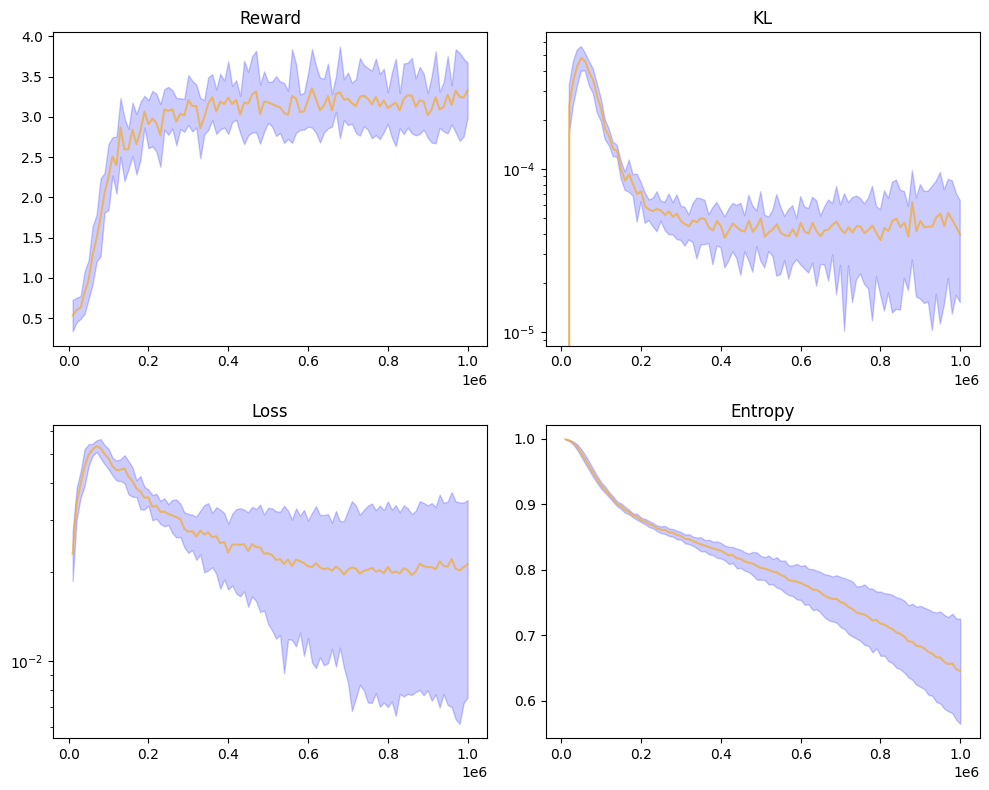

In [44]:
path = "/home/rdellave/ray_results/run_2023-07-21_14-57-18/"
# plot_all_micarl(path,figsize=(10,8)) 
plot_all_av_std(path,100)
plt.savefig("/home/rdellave/ray_results/Figures/MinatarBreakout___"+path.replace("/","_")+".pdf", format='pdf')

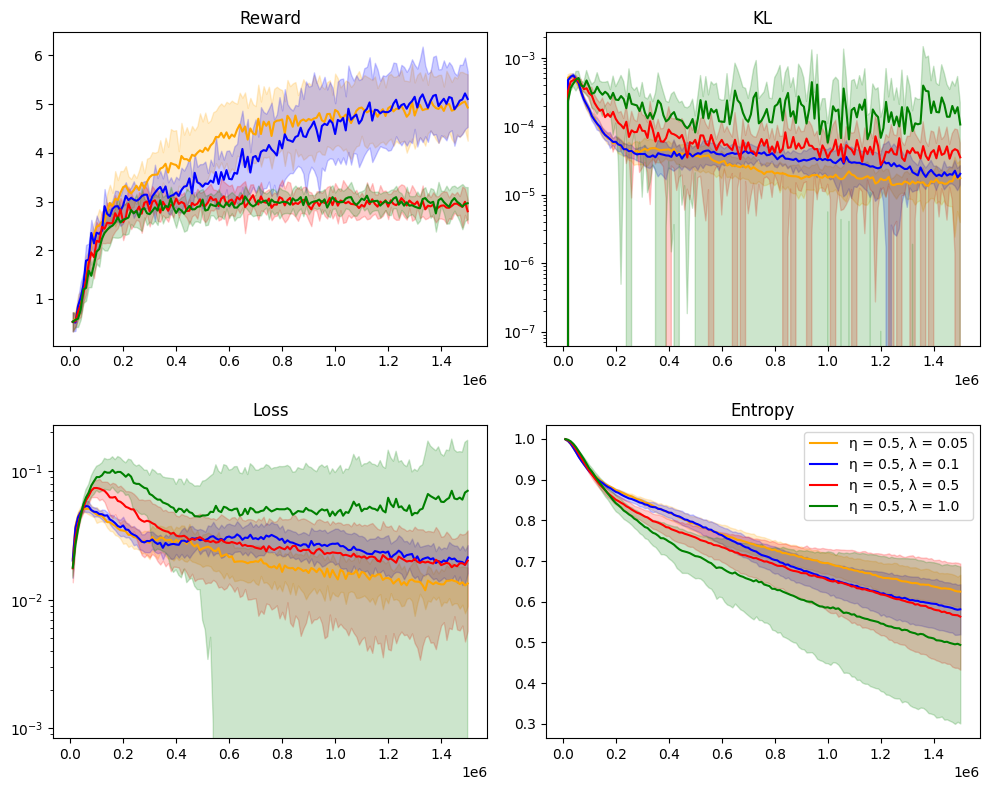

In [54]:
path = "/home/rdellave/ray_results/run_2023-08-03_21-18-58/"
# plot_all_micarl(path,figsize=(10,8)) 
plot_all_av_std_by_pmts2(path)
plt.savefig("/home/rdellave/ray_results/Figures/MinatarBreakout___"+path.replace("/","_")+".pdf", format='pdf')

### No regularization 
This is the baseline for previous experiments.

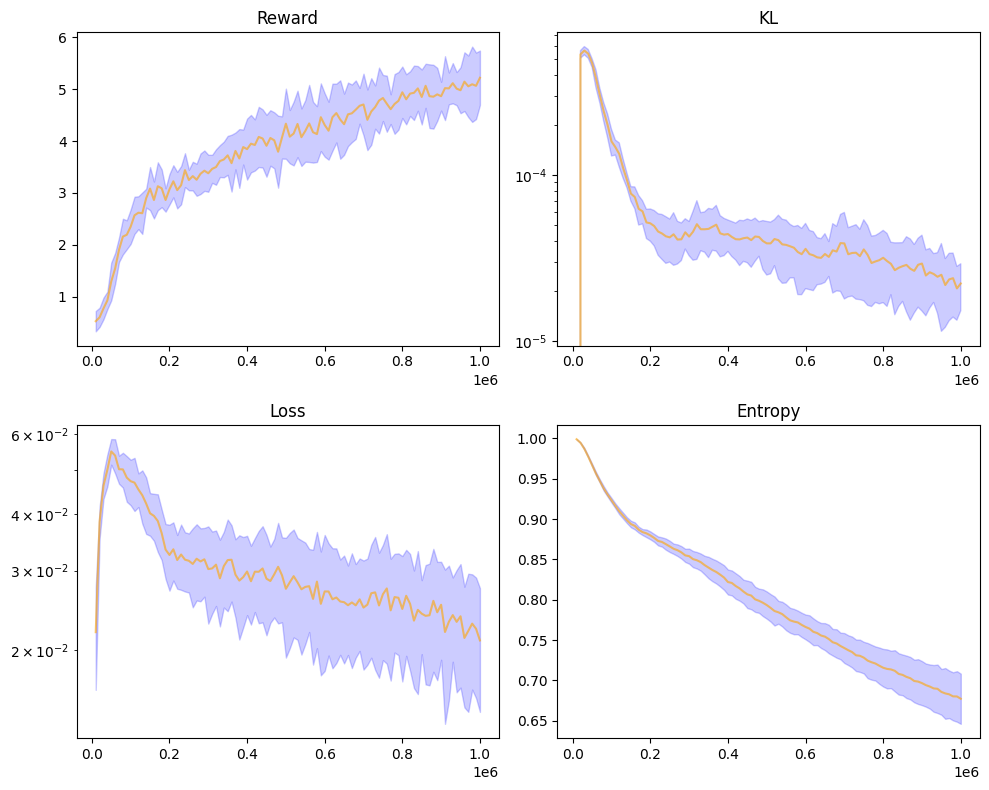

In [13]:
path = "/home/rdellave/ray_results/run_2023-07-25_19-10-11/"
# plot_all_micarl(path,figsize=(10,8)) 
plot_all_av_std(path,100)
plt.savefig("/home/rdellave/ray_results/Figures/MinatarBreakout___"+path.replace("/","_")+".pdf", format='pdf')